#### Question 1: Data analysis

In [3]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (2 * X["Var1"] + 0.5 * X["Var5"] - 1 * X["Var10"] + np.random.normal(0, 0.5, num_samples)  # Add some noise
    )

1. Split the data into training and test data. The proportion of train data should be 70%. 

In [56]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4400)

2. Fit the model with a linear regression using all the features, report the coefficient table, intercept and MSE. 

In [61]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lm = LinearRegression()
lm.fit(X_train, y_train)
y_linear = lm.predict(X_test)
y_linear


MSE = mean_squared_error(y_test, y_linear)
print('The MSE is', MSE)


lm.fit(X, y)
coefficients = lm.coef_
# Create a DataFrame to display the coefficients with variable names
coef_df = pd.DataFrame({'Variable': variable_name, 'Coefficient': coefficients})
# Print the DataFrame
print(coef_df)

The MSE is 0.2833049093499735
   Variable  Coefficient
0     Var20     2.014610
1     Var20    -0.081270
2     Var20    -0.042229
3     Var20     0.040105
4     Var20     0.439223
5     Var20     0.064899
6     Var20     0.027779
7     Var20     0.068921
8     Var20    -0.073308
9     Var20    -1.031674
10    Var20    -0.001053
11    Var20     0.052927
12    Var20     0.009953
13    Var20     0.024712
14    Var20    -0.074581
15    Var20    -0.072498
16    Var20    -0.056306
17    Var20     0.088936
18    Var20     0.021261
19    Var20     0.078586


3. Fit the model with a polynomial regression with degree 2, report the MSE. Is it necessary to use polynomial regression in this case?

In [11]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)


# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)


X_poly_test = poly_features.fit_transform(X_test)
y_poly_test = poly_model.predict(X_poly_test)


MSE = mean_squared_error(y_test, y_poly_test)
print(MSE)

0.3912959808588364


It would not make any sense since we can see that the linear regression MSE is much lower than this MSE 

4. Fit the model with a Lasso regression, tune the parameter for the penalty parameter $\alpha$. Report the best $\alpha$, MSE and which variables are left in the model in the end. 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]


# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}


lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


# Get the best alpha value from the tuning
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)


# Fit a Ridge regression model with the best alpha value
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)


# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)


# Print the results
print("Mean Squared Error (MSE):", mse)

0.01
Mean Squared Error (MSE): 0.27893476514858456


In [14]:


import pandas as pd
from pandas import DataFrame


coeff_df = DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(lasso_model.coef_)
print(coeff_df)


   Feature  Coefficient Estimate
0     Var1              0.566406
1     Var2             -0.012671
2     Var3             -0.024085
3     Var4              0.000000
4     Var5              0.111930
5     Var6              0.000000
6     Var7              0.008001
7     Var8              0.017024
8     Var9             -0.013400
9    Var10             -0.306822
10   Var11              0.000000
11   Var12              0.012300
12   Var13              0.000000
13   Var14             -0.000000
14   Var15             -0.006134
15   Var16             -0.002697
16   Var17             -0.016334
17   Var18              0.025483
18   Var19              0.013672
19   Var20              0.024080


5. Define a new target variable $y_1$ such that $y_1$ only contains all the positive values in the $y$. Process $X$ as well. Fit the model with appropriate GLM model (not Gaussian). Report the MSE and can we compare the MSE with previous questions? Hint: it is a continous distribution. 

In [68]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import gamma

new_df = X.copy()
new_df['y'] = y
x_y = new_df[new_df['y'] > 0]
y1 = x_y['y']
new_df = x_y.drop(columns = ["y"])


X_train, X_test, y_train, y_test = train_test_split(new_df, y1, test_size = 0.3, 
                                                    random_state = 4400)

gamma_model = sm.GLM(y_train, X_train, family = 
                     sm.families.Gamma(link = sm.families.links.log()))
gamma_results = gamma_model.fit()
y_pred_gamma = gamma_results.predict(X_test)
mse_gamma = mean_squared_error(y_test, y_pred_gamma)

print("MSE for Gamma is: ", mse_gamma)



MSE for Gamma is:  0.26236130418363846


6. Define a new target variable $y_2$ such that $y_2$ is a binary categorical variable. If $y$ is larger than 1, then $y_2$ is "group1", otherwise it is "group2". Fit the $y_2$ and $X$ with a logistic regression. Print the summary table with .summary(), and interpret the coefficient for variable 1.  

In [70]:
x_y2 = X.copy 
x_y2['y2'] = y.apply (lambda x: 0 if x > 1 else 1)
x_y2 = x_y2[x_y2['y2'] == 0]

y2 = x_y2['y2']
x_y2 = x_y2.drop(columns = ["y2"])
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(new_df, y1, test_size = 0.3, 
                                                    random_state = 4400)

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()
y_pred = results.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

TypeError: 'method' object does not support item assignment

In [ ]:
# Make a new dataframe with a binary column (instead of group 1 and 2) where group 1 is 0 and group2 is 1
X_Y2 = X.copy()
X_Y2['y2'] = y.apply(lambda x: 0 if x > 1 else 1)


#We want to isolate the y2 (so when y is larger than 0, so the binary number 0)
X_Y2 = X_Y2[X_Y2['y2'] == 0]

#Get all the group 1 values
y2 = X_Y2['y2']

#Drop the Y column
X_Y2 = X_Y2.drop(columns = ["y2"])


X = sm.add_constant(X)

#### Question 2: Implement Gradient descend for Polynomial Regression

Implement gradient descend method for the polynomial regression. Requirement: 
1. Write the method as a function, which is given here. Notice that it takes an input "degree" (and any other necessary inputs) so that we can change the degree of the polynomial. 
2. Output the cost history as well as the coefficient estimates. No need to print it or make the figures. As long as it is one of the output. 
3. Verify your function with the data in Question 1 (You may need to copy/paste and run the answer in Question 1-1 before you run the verification). No need to compare your coefficients to the ones in question 1. This step is only to make sure your functions work. You can set the degree as 2 in the verification. 

Hint: 
1. Don't overthinking the question. What is the difference between linear regression and polynomial regression?
2. You may need two functions here. One for pre-processing the data, while the other one for gradient desent. You can add more if you need. Like to add another one for the cost function. 
3. When initializing the theta, think about how many coefficients you may need?

In [39]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def poly_function(degree, X):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly

def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, num_iterations, learning_rate, degree):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history




In [53]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (2 * X["Var1"] + 0.5 * X["Var5"] - 1 * X["Var10"] + np.random.normal(0, 0.5, num_samples)  # Add some noise
    )

degree = 2
X_poly = poly_function(degree, X)
theta, cost_history = gradient_descent(X_poly, y, num_iterations=1000, learning_rate=0.01, degree=degree)





#### Question 3: Simulation study

Following is a simulation study. In the second code chuck, please correctly label the xlabel and ylabel for the plot. Also explain what this code is trying to do and what you have learned from the generated figure. 

Hint: in the simulation data, there are 200 observations and it is fixed for each trial. After spliting the training and testing data, each one will have 100 observations. 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(83)
A = np.arange(5,101,1)
B = []

for p in A:
    
    X = pd.DataFrame()
    for i in np.arange(1, p+1):
        variable_name = f"Var{i}"
        X[variable_name] = np.random.rand(200)

    y = 2 * X["Var1"] - 0.5 * X["Var5"] + np.random.normal(0, 0.5, 200)

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.5, 
                                                        random_state=83)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    value = mean_squared_error(y_test, y_pred)
    B.append(value)

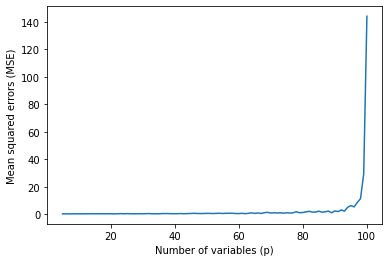

In [46]:
plt.plot(A, B)
plt.xlabel("Number of variables (p)")
plt.ylabel("Mean squared errors (MSE)")
plt.show()

In this graph we can see that MSE is calculated and it is added to a new list called B. We can see that the MSE is calculated for each of the variable and then added to it. So we can say that Column B is a list of Mean Squared Errors and lis A is a random variable from 5 to 100. What we can see in this graph is a line graph that shows how the MSE icreases as more variables are added to the dataset. It makes us understand that adding more variables to the model affects its predictive accuracy.